**Problem statement :**
- The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.

- The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

- The total cost of a prediction model the sum of `Cost_1` multiplied by the number of Instances with type 1 failure and `Cost_2` with the number of instances with type 2 failure, resulting in a `Total_cost`. In this case `Cost_1` refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while `Cost_2` refer to the cost of missing a faulty truck, which may cause a breakdown.

`Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.`

In [ ]:
import pandas as pd

In [ ]:
# read the data

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_project/dataset/APS/train.csv", na_values="na")
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
class,0
aa_000,0
ab_000,27896
ac_000,2141
ad_000,9200
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


In [ ]:
df.shape

(36188, 171)

In [ ]:
# check values count for target variable - class
df['class'].value_counts()

,count
class,
neg,35188
pos,1000


Problem 1: we need to handle the imbalance data

In [ ]:
# count of numerical and non numerical columns

numeric_features = [features for features in df.columns if df[features].dtype != "O"]
cat_features = [features for features in df.columns if df[features].dtype == "O"]

print(f"we have {len(numeric_features)} numerical features : {numeric_features}")
print(f"we have {len(cat_features)} categorical features : {cat_features}")


we have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

In [ ]:
# checking the missing values
df.isnull().sum()

,0
class,0
aa_000,0
ab_000,27896
ac_000,2141
ad_000,9200
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


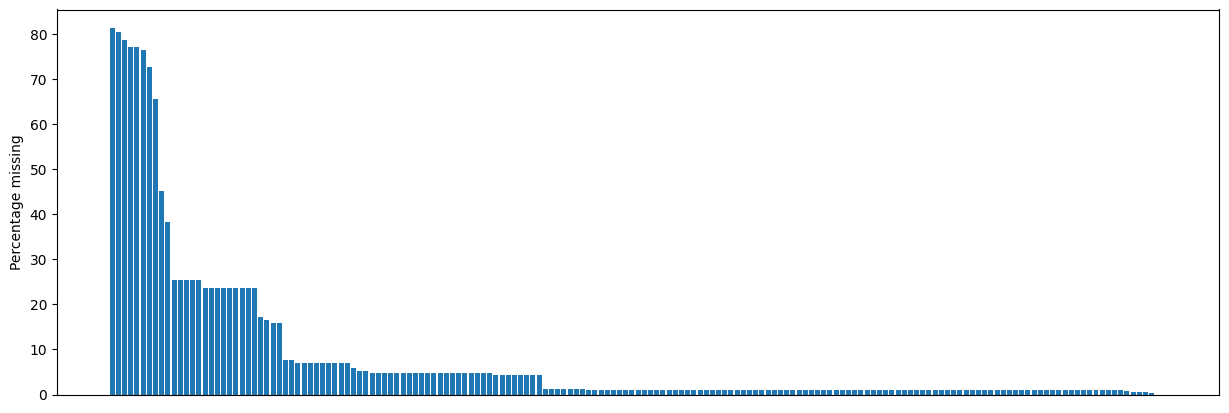

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

ax.bar(missing.index, missing.values.T[0])

plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [ ]:
# dropping columns which has more than 70% of misisng values
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [ ]:
df.drop(columns=dropcols.index,  inplace=True)

problem 2 - we need to handle the missing datas

In [ ]:
# to check the total percentage of missing values inside a full dataset
import numpy as np


missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print(f"percentage of total missing cell in the data {(total_missing/total_cells)*100}")

percentage of total missing cell in the data 5.37059852747306


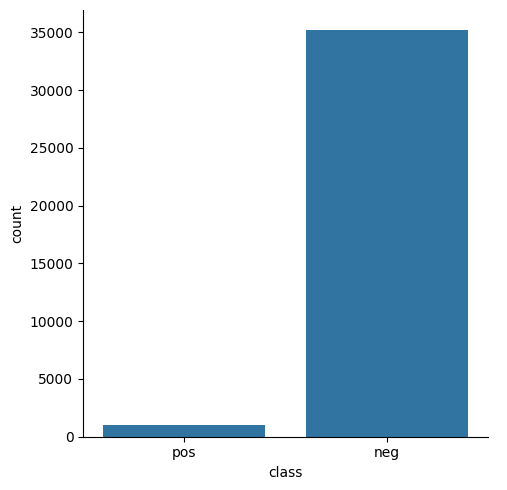

In [ ]:
# visulaize the uniqye value in Target

import seaborn as sns

sns.catplot(data=df, x="class", kind="count")

SMOTETomek -> https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
# Manually encoding the target Variable
y = y.replace({"pos":1, "neg":0})

In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
36183,0
36184,0
36185,0
36186,0


In [ ]:
# Experiment 1 -> mean
# Experiment 2 -> constasnt
# Exepriment 3 -> median

Robust scalar -
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
# Experiment 1 -> Mean imputing with RobustScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

robust_scaler = RobustScaler()
x1 = robust_scaler.fit_transform(X)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer

In [ ]:
mean_pipeline = Pipeline(steps=
 [("imputer" , SimpleImputer(strategy="mean")),
 ("RobustScaler", RobustScaler())]
)

In [ ]:
X_mean = mean_pipeline.fit_transform(X)

In [ ]:
mean_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('RobustScaler', RobustScaler())])

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_mean, y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "XG boost" : XGBClassifier(),
    "Knn" : KNeighborsClassifier(),
    "logistic" : LogisticRegression()
}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            f1_score, roc_auc_score, confusion_matrix


def evaluate_clf(true, predicted):

  acc= accuracy_score(true, predicted)
  pre= precision_score(true, predicted)
  recall= recall_score(true, predicted)
  f1= f1_score(true, predicted)
  auc= roc_auc_score(true, predicted)

  return acc, pre, recall, f1, auc

def total_cost(true, predicted):
  tn, fp, fn, tp = confusion_matrix(true, predicted).ravel()
  cost = 10*fp + 500*fn
  return cost

def evaluate_models(X, y, models):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  cost_list = []
  models_list = []

  for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #make predictions
    y_test_pred = model.predict(X_test)

    # performance
    acc, pre, recall, f1, auc = evaluate_clf(y_test, y_test_pred)
    cost = total_cost(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("Model performance on test data")
    print(f'- Accuracy: {acc}')
    print(f'- precision: {pre}')
    print(f'- recall: {recall}')
    print(f'- f1 score: {f1}')
    print(f'- auc: {auc}')
    print(f'- cost: {cost}')

    cost_list.append(cost)
    print('='*35)

  report = pd.DataFrame(list(zip(models_list, cost_list)), columns=["Model Name", "Cost"]).sort_values(by=["Cost"])

  return report



In [ ]:
report = evaluate_models(X_res, y_res, models)

Random forest
Model performance on test data
- Accuracy: 0.9924479908805928
- precision: 0.9889157311354271
- recall: 0.9959925576069844
- f1 score: 0.9924415288077582
- auc: 0.9924635791297797
- cost: 14780
Decision Tree
Model performance on test data
- Accuracy: 0.9865346252493588
- precision: 0.9836368810472396
- recall: 0.9894089022470302
- f1 score: 0.9865144488048518
- auc: 0.9865472657071439
- cost: 38150
XG boost
Model performance on test data
- Accuracy: 0.9952265602735823
- precision: 0.9931584948688712
- recall: 0.9972806640904537
- f1 score: 0.9952153110047847
- auc: 0.9952355937844806
- cost: 9980
Knn
Model performance on test data
- Accuracy: 0.9745654032487888
- precision: 0.96105702364395
- recall: 0.9889795334192071
- f1 score: 0.9748183677787967
- auc: 0.9746287935219173
- cost: 41300
logistic
Model performance on test data
- Accuracy: 0.6426332288401254
- precision: 0.5912415517081752
- recall: 0.9139831114927723
- f1 score: 0.7180121430177647
- auc: 0.64382656780483

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
report

,Model Name,Cost
2,XG boost,9980
0,Random forest,14780
1,Decision Tree,38150
3,Knn,41300
4,logistic,344650


In [ ]:
constant_pipeline = Pipeline(steps=
 [("imputer" , SimpleImputer(strategy="constant", fill_value=0)),
 ("RobustScaler", RobustScaler())]
)

X_constant = constant_pipeline.fit_transform(X)

smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_constant, y)

report = evaluate_models(X_res, y_res, models)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
report

In [ ]:
median_pipeline = Pipeline(steps=
 [("imputer" , SimpleImputer(strategy="median")),
 ("RobustScaler", RobustScaler())]
)

X_median = median_pipeline.fit_transform(X)

smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_median, y)

report = evaluate_models(X_res, y_res, models)

In [ ]:
report

In [ ]:
# Experiemnt 4 - Knn imputer

knn_pipeline = Pipeline(steps=
 [("imputer" , KNNImputer(n_neighbors=3)),
 ("RobustScaler", RobustScaler())]
)

X_knn = knn_pipeline.fit_transform(X)

smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_knn, y)

report = evaluate_models(X_res, y_res, models)

In [ ]:
# experiment 5 - PCA with median

from sklearn.decomposition import PCA

pca_pipeline = Pipeline(steps=
 [("imputer" , SimpleImputer(strategy="median")),
 ("RobustScaler", RobustScaler())]
)


X_pca = pca_pipeline.fit_transform(X)


#apply pca
var_ratio = {}
for n in range(2, 150):
  pc = PCA(n_components=n)
  df_pca = pc.fit(X_pca)
  var_ratio[n] = sum(df_pca.explained_variance_ratio_)

In [ ]:
var_ratio

{2: 0.9992298293315844,
 3: 0.9994359376999226,
 4: 0.999560711194959,
 5: 0.9996470138129643,
 6: 0.999728327800765,
 7: 0.9997863989886598,
 8: 0.9998409942508807,
 9: 0.9998833399986881,
 10: 0.999921897388031,
 11: 0.9999435708357656,
 12: 0.9999596947338397,
 13: 0.9999685841181182,
 14: 0.9999751754215898,
 15: 0.9999807327150352,
 16: 0.9999860398774756,
 17: 0.9999891489906072,
 18: 0.999991370267194,
 19: 0.9999933426014599,
 20: 0.9999951833104651,
 21: 0.9999965863409535,
 22: 0.9999976015670325,
 23: 0.9999983859889042,
 24: 0.9999988350884713,
 25: 0.9999992340756368,
 26: 0.9999995477699408,
 27: 0.9999997326428104,
 28: 0.9999998818637938,
 29: 0.9999999137249324,
 30: 0.9999999448368735,
 31: 0.9999999657253241,
 32: 0.9999999860835906,
 33: 0.9999999925306292,
 34: 0.9999999954639525,
 35: 0.9999999974959978,
 36: 0.9999999986080951,
 37: 0.9999999991643694,
 38: 0.9999999994546385,
 39: 0.9999999996921334,
 40: 0.9999999998211411,
 41: 0.9999999999302807,
 42: 0.99999

<Axes: >

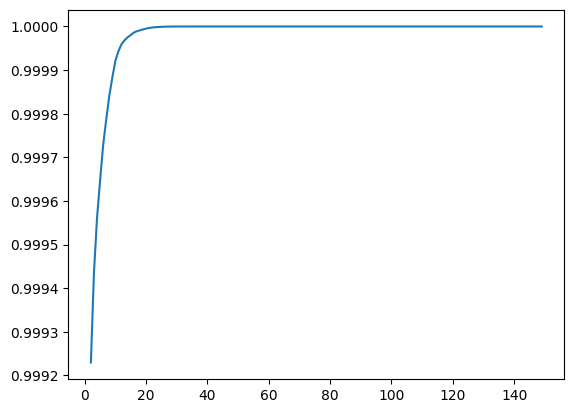

In [ ]:
pd.Series(var_ratio).plot()

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio = list(var_ratio.values())
components = list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio)


fig = plt.figure(figsize=(5,5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k = components[knee.knee]
print("Knee locator k = ", k)

In [ ]:
pca_final = PCA(n_components=16)

reduced = pca_final.fit_transform(X_pca)

In [ ]:
smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(reduced, y)

report = evaluate_models(X_res, y_res, models)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Random forest
Model performance on test data
- Accuracy: 0.9840883027522935
- precision: 0.9799270072992701
- recall: 0.9888101983002833
- f1 score: 0.9843485617597293
- auc: 0.984030752081076
- cost: 40930
Decision Tree
Model performance on test data
- Accuracy: 0.9744122706422018
- precision: 0.9723749119097956
- recall: 0.9771954674220963
- f1 score: 0.9747792299540798
- auc: 0.9743783489170841
- cost: 82460
XG boost
Model performance on test data
- Accuracy: 0.9781393348623854
- precision: 0.9741681875614208
- recall: 0.9828611898016997
- f1 score: 0.9784953817951069
- auc: 0.9780817846861081
- cost: 62340
Knn
Model performance on test data
- Accuracy: 0.9642345183486238
- precision: 0.9573400250941029
- recall: 0.9726628895184136
- f1 score: 0.9649406309281249
- auc: 0.9641317929890385
- cost: 99560
logistic
Model performance on test data
- Accuracy: 0.8194524082568807
- precision: 0.8856803125530831
- recall: 0.7385269121813031
- f1 score: 0.8054375531011045
- auc: 0.820438731772

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
report

,Model Name,Cost
0,Random forest,43080
2,XG boost,62870
1,Decision Tree,79100
3,Knn,104070
4,logistic,1108620


In [ ]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["XGBClassifier","Simple Imputer-Constant","2950"])
pt.add_row(["XGBClassifier","Knn-Imputer","4460"])
pt.add_row(["XGBClassifier","Simple Imputer-Mean","4950"])
pt.add_row(["CatBoostClassifier","Median","5760"])
pt.add_row(["Random Forest","PCA","34150"])
print(pt)

+--------------------+-------------------------+------------+
|       Model        |    Imputation_method    | Total_cost |
+--------------------+-------------------------+------------+
|   XGBClassifier    | Simple Imputer-Constant |    2950    |
|   XGBClassifier    |       Knn-Imputer       |    4460    |
|   XGBClassifier    |   Simple Imputer-Mean   |    4950    |
| CatBoostClassifier |          Median         |    5760    |
|   Random Forest    |           PCA           |   34150    |
+--------------------+-------------------------+------------+


In [ ]:
# training of the main model

final_model = XGBClassifier()

constant_pipeline = Pipeline(steps=
 [("imputer" , SimpleImputer(strategy="constant", fill_value=0)),
 ("RobustScaler", RobustScaler())]
)

X_constant = constant_pipeline.fit_transform(X)

smt = SMOTETomek(sampling_strategy="minority", n_jobs=-1)
X_res, y_res = smt.fit_resample(X_constant, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
accuracy_score(y_pred, y_test)

0.9965077328772005

In [ ]:
model.score(X_train, y_train)

0.9999821813581369

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[6957,   44],
       [   5, 7025]])